In [1]:
from trajectory import Trajectory

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import numpy as np

traj = Trajectory()
traj.x.shape


(3, 1000)


(1000,)

In [6]:
traj.z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

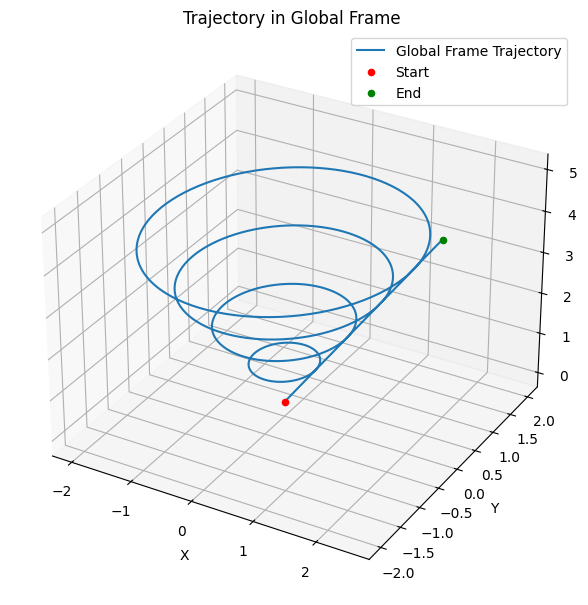

In [2]:
fig = plt.figure(figsize=(16, 8))

# Global frame plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(traj.x, traj.y, traj.z, label='Global Frame Trajectory')
ax1.scatter(traj.x[0], traj.y[0], traj.z[0], color='red', label='Start')
ax1.scatter(traj.x[-1], traj.y[-1], traj.z[-1], color='green', label='End')
ax1.set_title('Trajectory in Global Frame')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()


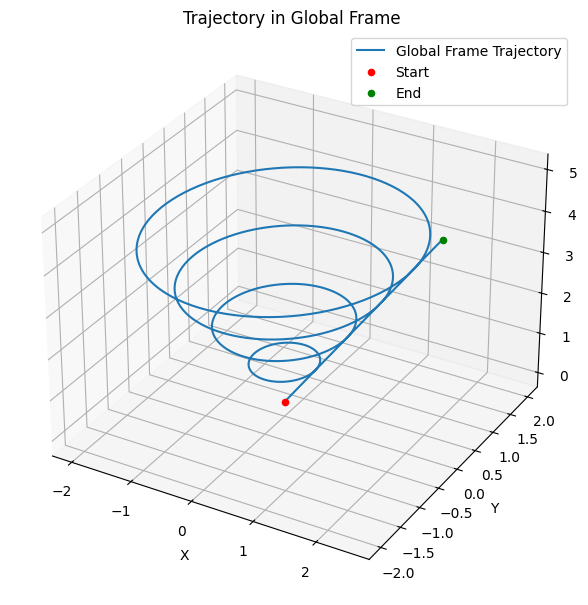

In [3]:
plt.ion()  # Turn on interactive mode
fig = plt.figure(figsize=(16, 8))

# Global frame plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(traj.x, traj.y, traj.z, label='Global Frame Trajectory')
ax1.scatter(traj.x[0], traj.y[0], traj.z[0], color='red', label='Start')
ax1.scatter(traj.x[-1], traj.y[-1], traj.z[-1], color='green', label='End')
ax1.set_title('Trajectory in Global Frame')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()
plt.show()

In [4]:
import plotly.graph_objects as go
import numpy as np

# Assuming traj and transformations are ready
fig = go.Figure(data=[go.Scatter3d(
    x=traj.x, y=traj.y, z=traj.z,
    mode='lines+markers',
    marker=dict(size=4, color='red', opacity=0.8),
    line=dict(color='blue', width=2),
    name='Trajectory'
)])

fig.add_trace(go.Scatter3d(
    x=[traj.x[0]], y=[traj.y[0]], z=[traj.z[0]],
    mode='markers', marker=dict(size=6, color='green'),
    name='Start'
))

fig.add_trace(go.Scatter3d(
    x=[traj.x[-1]], y=[traj.y[-1]], z=[traj.z[-1]],
    mode='markers', marker=dict(size=6, color='purple'),
    name='End'
))

fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10)
)

fig.show()


In [7]:
import numpy as np

def create_trajectory(waypoints, duration, frequency):
    # Calculate the number of points in the trajectory
    total_points = duration * frequency + 1  # +1 to include the endpoint
    
    # Create a time array from 0 to duration
    times = np.linspace(0, duration, num=total_points)
    
    # Assuming waypoints are given as a list of tuples [(x1, y1), (x2, y2), ..., (xn, yn)]
    waypoints = np.array(waypoints)
    
    # Interpolate for each dimension independently
    x = np.interp(times, np.linspace(0, duration, num=len(waypoints)), waypoints[:, 0])
    y = np.interp(times, np.linspace(0, duration, num=len(waypoints)), waypoints[:, 1])
    
    return np.column_stack((x, y))

# Example usage
waypoints = [(0, 0), (1, 2), (4, 5), (7, 8)]
duration = 10  # seconds
frequency = 1  # Hz (points per second)

trajectory = create_trajectory(waypoints, duration, frequency)
print(trajectory)


[[0.  0. ]
 [0.3 0.6]
 [0.6 1.2]
 [0.9 1.8]
 [1.6 2.6]
 [2.5 3.5]
 [3.4 4.4]
 [4.3 5.3]
 [5.2 6.2]
 [6.1 7.1]
 [7.  8. ]]
